# Solving the clustering Issue

In [114]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('customer_segmentation.csv')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


## Feature Selection

*Interesting*: Birth, Education, Martial Status, Income, MntWines

*Medicore*: ID, Kidhome, Teenhome, Dt_Customer, Recency, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePruchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, Accepted Cmp5, Accepted Cmp1, Accepted Cmp2

*Drop*: MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, Complain, Z_CostContact, Z_Revenue, Response

In [8]:
drop_col = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(columns=drop_col, inplace=True)

In [9]:
# drop null values of "Income" column
df = df.dropna(subset=["Income"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  AcceptedCmp3         2216 non-null   int64 

In [127]:
from sklearn.cluster import KMeans
# Assuming 'selected_features' is a list of feature columns
selected_columns = ["Income", "MntWines", "Year_Birth", "Recency", "NumDealsPurchases" , "NumWebPurchases" ]
X = df[selected_columns]

# Specify the number of clusters (k)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
df['cluster'] = kmeans.fit_predict(X)

In [128]:
# Silhoutte Score: measures how well the clusters are separarted (-1 to 1)
# Inertia: measures how far points are away from the centroids
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
print("Inertia:", kmeans.inertia_/1000000)

Silhouette Score: 0.5503091029129403
Inertia: 136436.01078749474


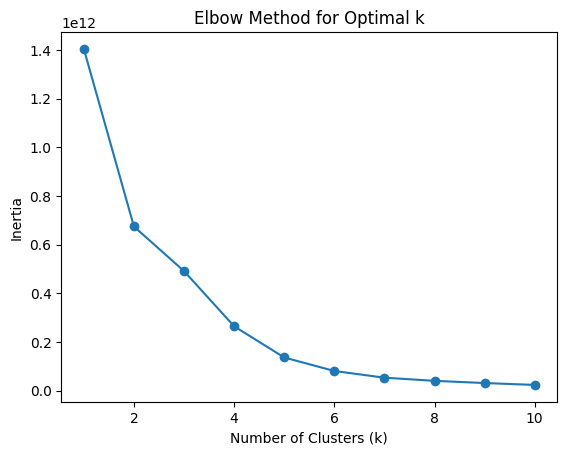

In [129]:
# Elbow method based on the inertia scores
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### based on the visual depicted above, k is set to 5

In [122]:
# Conduct a PCA analysis to reduce the dimensionality to 3-D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_df = pca.fit_transform(X)

component_loadings = pd.DataFrame(pca.components_, columns=X.columns)
print(component_loadings)

"""# Get the names of the PCA
component_names = [f'Principal Component {i+1}' for i in range(pca.n_components_)]

# Create a DataFrame with the reduced data and component names
reduced_df = pd.DataFrame(reduced_df, columns=component_names)

# Access the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print the names of the principal components and their explained variance ratios
for i, component in enumerate(component_names):
    print(f"{component}: {explained_variance_ratios[i]:.2%}")"""

     Income  MntWines  Year_Birth   Recency  NumDealsPurchases  \
0  0.999970  0.007755   -0.000077 -0.000005          -0.000006   
1  0.007755 -0.999953    0.003523 -0.002351          -0.000489   
2  0.000022 -0.002372   -0.007512  0.999968           0.000027   

   NumWebPurchases  
0         0.000042  
1        -0.004023  
2        -0.001234  


'# Get the names of the PCA\ncomponent_names = [f\'Principal Component {i+1}\' for i in range(pca.n_components_)]\n\n# Create a DataFrame with the reduced data and component names\nreduced_df = pd.DataFrame(reduced_df, columns=component_names)\n\n# Access the explained variance ratios\nexplained_variance_ratios = pca.explained_variance_ratio_\n\n# Print the names of the principal components and their explained variance ratios\nfor i, component in enumerate(component_names):\n    print(f"{component}: {explained_variance_ratios[i]:.2%}")'

In [126]:
# Visualize the data after reducing the dataframe
reduced_df
# Assuming reduced_data is a NumPy array resulting from PCA
# Replace 'Principal Component 1', 'Principal Component 2', 'Principal Component 3' with your actual column names
columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
reduced_df = pd.DataFrame(reduced_df, columns=columns)

# Rename columns to 'PCA1', 'PCA2', 'PCA3'
reduced_df.columns = ['PCA1', 'PCA2', 'PCA3']

# Now, reduced_df columns are renamed
print(reduced_df)

              PCA1        PCA2       PCA3
0      5893.130899 -284.288344   8.420582
1     -5905.353384  248.283696 -10.331923
2     19366.104457   29.306056 -22.840457
3    -25602.763224   95.653725 -23.000029
4      6044.541368  178.902869  45.342367
...            ...         ...        ...
2211   8978.611313 -334.300480  -3.761758
2212  11767.179173   -9.766236   7.178453
2213   4738.280513 -566.216007  40.573008
2214  16998.191864    8.960259 -40.827649
2215    620.016560  225.875895  -8.361224

[2216 rows x 3 columns]


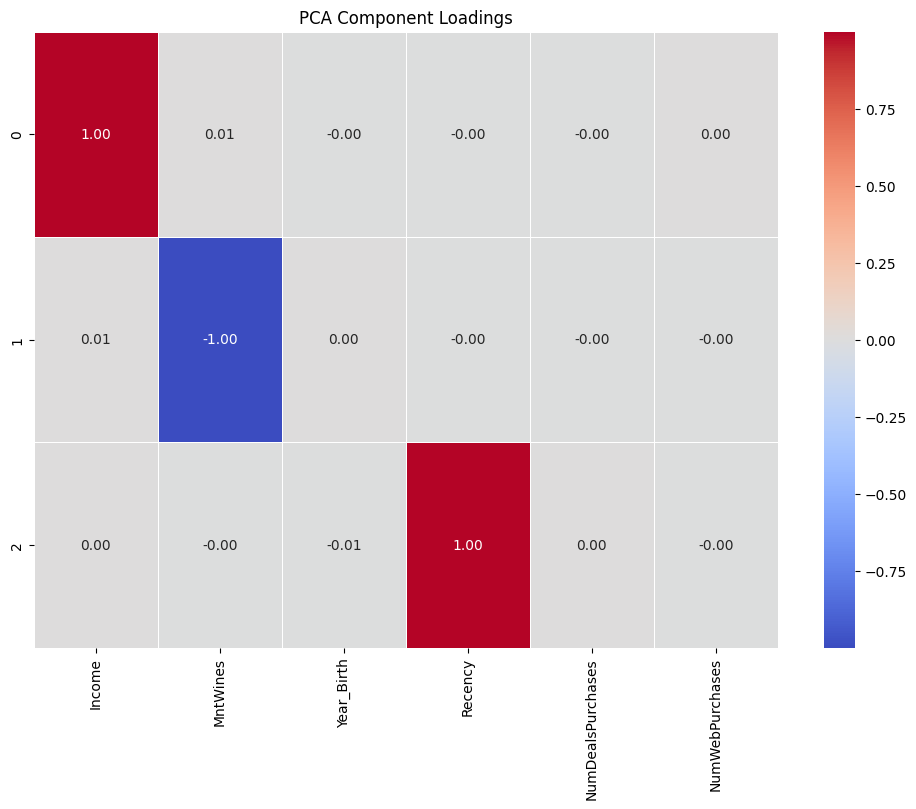

In [106]:
plt.figure(figsize=(12, 8))
sns.heatmap(component_loadings, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('PCA Component Loadings')
plt.show()

In [137]:
component_loadings = kmeans.labels_
fig = px.scatter_3d(reduced_df, x="PCA1", y="PCA2", z="PCA3",
                    opacity=0.8, size_max=10,
                    title='Clusters in Reduced Space after PCA')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [139]:
fig = px.scatter(reduced_df, x = "PCA1", y = "PCA2")

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

zsh:1: command not found: nbformat
